# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x:'%.3f'%x)

### Understanding the structure of the data

In [ ]:
 #uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
foodhub = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
foodhub.shape

(1898, 9)

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
# Answer: int64,object,float64
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
foodhub.isnull().values.any()

False

#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
foodhub.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]
### 736 Orders are not rated

In [ ]:
# Write the code here
print(foodhub['rating'].value_counts())

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]
### Answer:



*   Weekend orders are more than doubled the amount of orders on the weekdays

*   The majority of ordered cuisine types are American, Japanese, Italian, and Chinese.
*   The Least ordered cuisine type are Korean, Vietnamese, and Spanish
*   French Cuisine type has the highest average cost of order.
*   Vietnamese has the lowest average cost of order.
*   Korean food takes the quickest to make
*   Southern food takes the longest to make




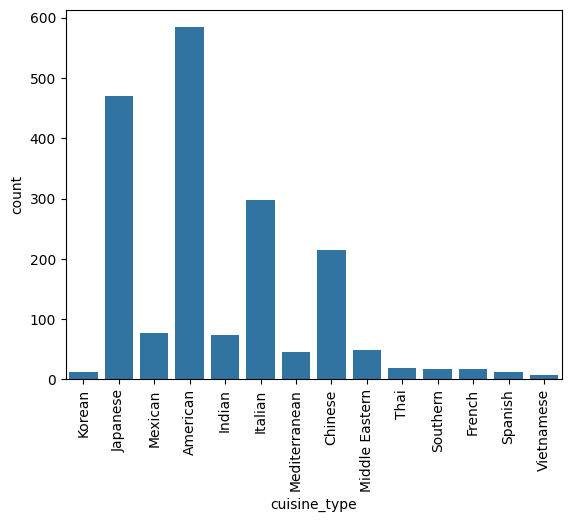

In [ ]:
sns.countplot(data=foodhub, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

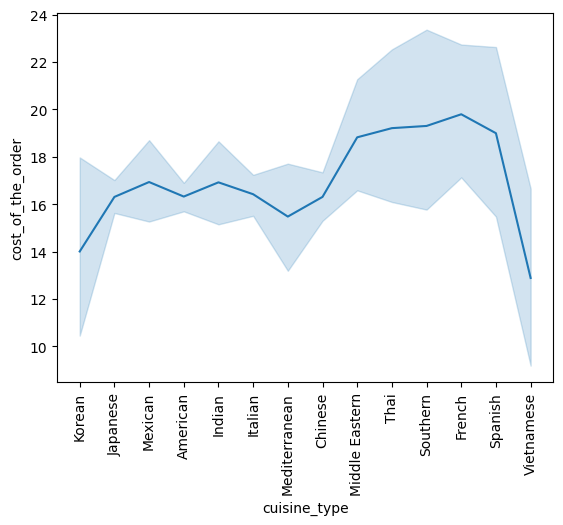

In [ ]:
sns.lineplot(data=foodhub,x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

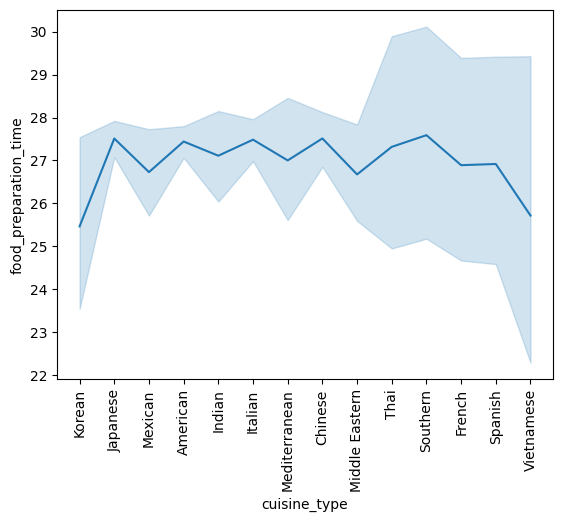

In [ ]:
sns.lineplot(data=foodhub,x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
#Answer: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm
top_orders = ['restaurant_name']
for column in top_orders:
  print(foodhub[column].value_counts())
  print("-" * 50)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64
--------------------------------------------------


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

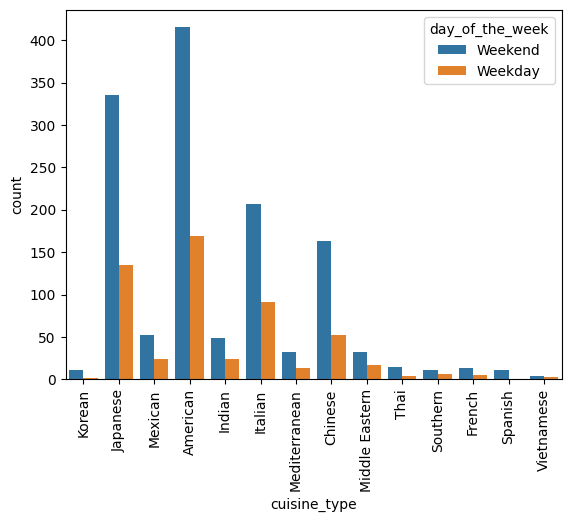

In [ ]:
# Write the code here
# Answer: American
sns.countplot(data=foodhub,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observations:


*   American, Japanese, and Italian are the top 3 most popular cuisines.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the percentage of orders that cost more than 20 dollars
percentage_above_20 = (foodhub['cost_of_the_order'] > 20).mean() * 100

# Print the result
print(f"{percentage_above_20:.2f}% of orders cost more than 20 dollars.")

29.24% of orders cost more than 20 dollars.




```
# This is formatted as code
```

#### Observations:


*   29.24% of orders cost more than 20 dollars.




### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
foodhub['delivery_time'].mean()

24.161749209694417

#### Observations:
The average order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
top_customers = ['customer_id']
for column in top_customers:
  print(foodhub[column].value_counts())
  print("-" * 50)


customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64
--------------------------------------------------


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]










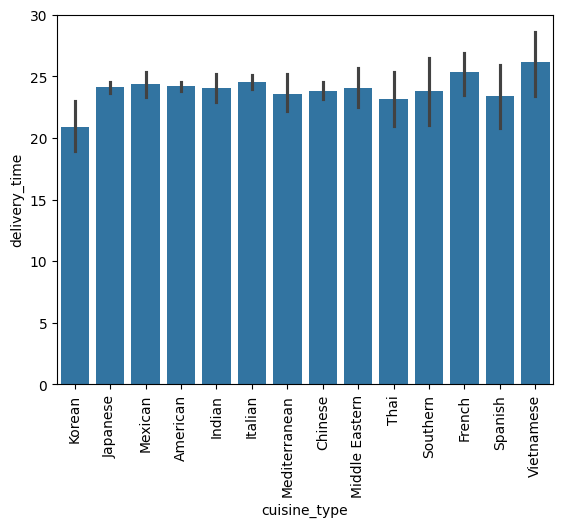

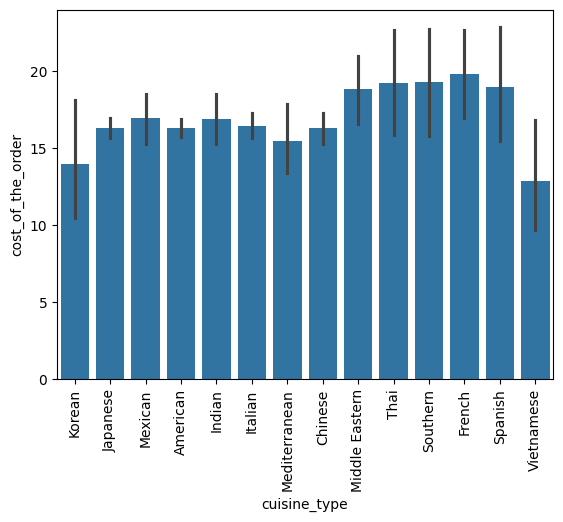

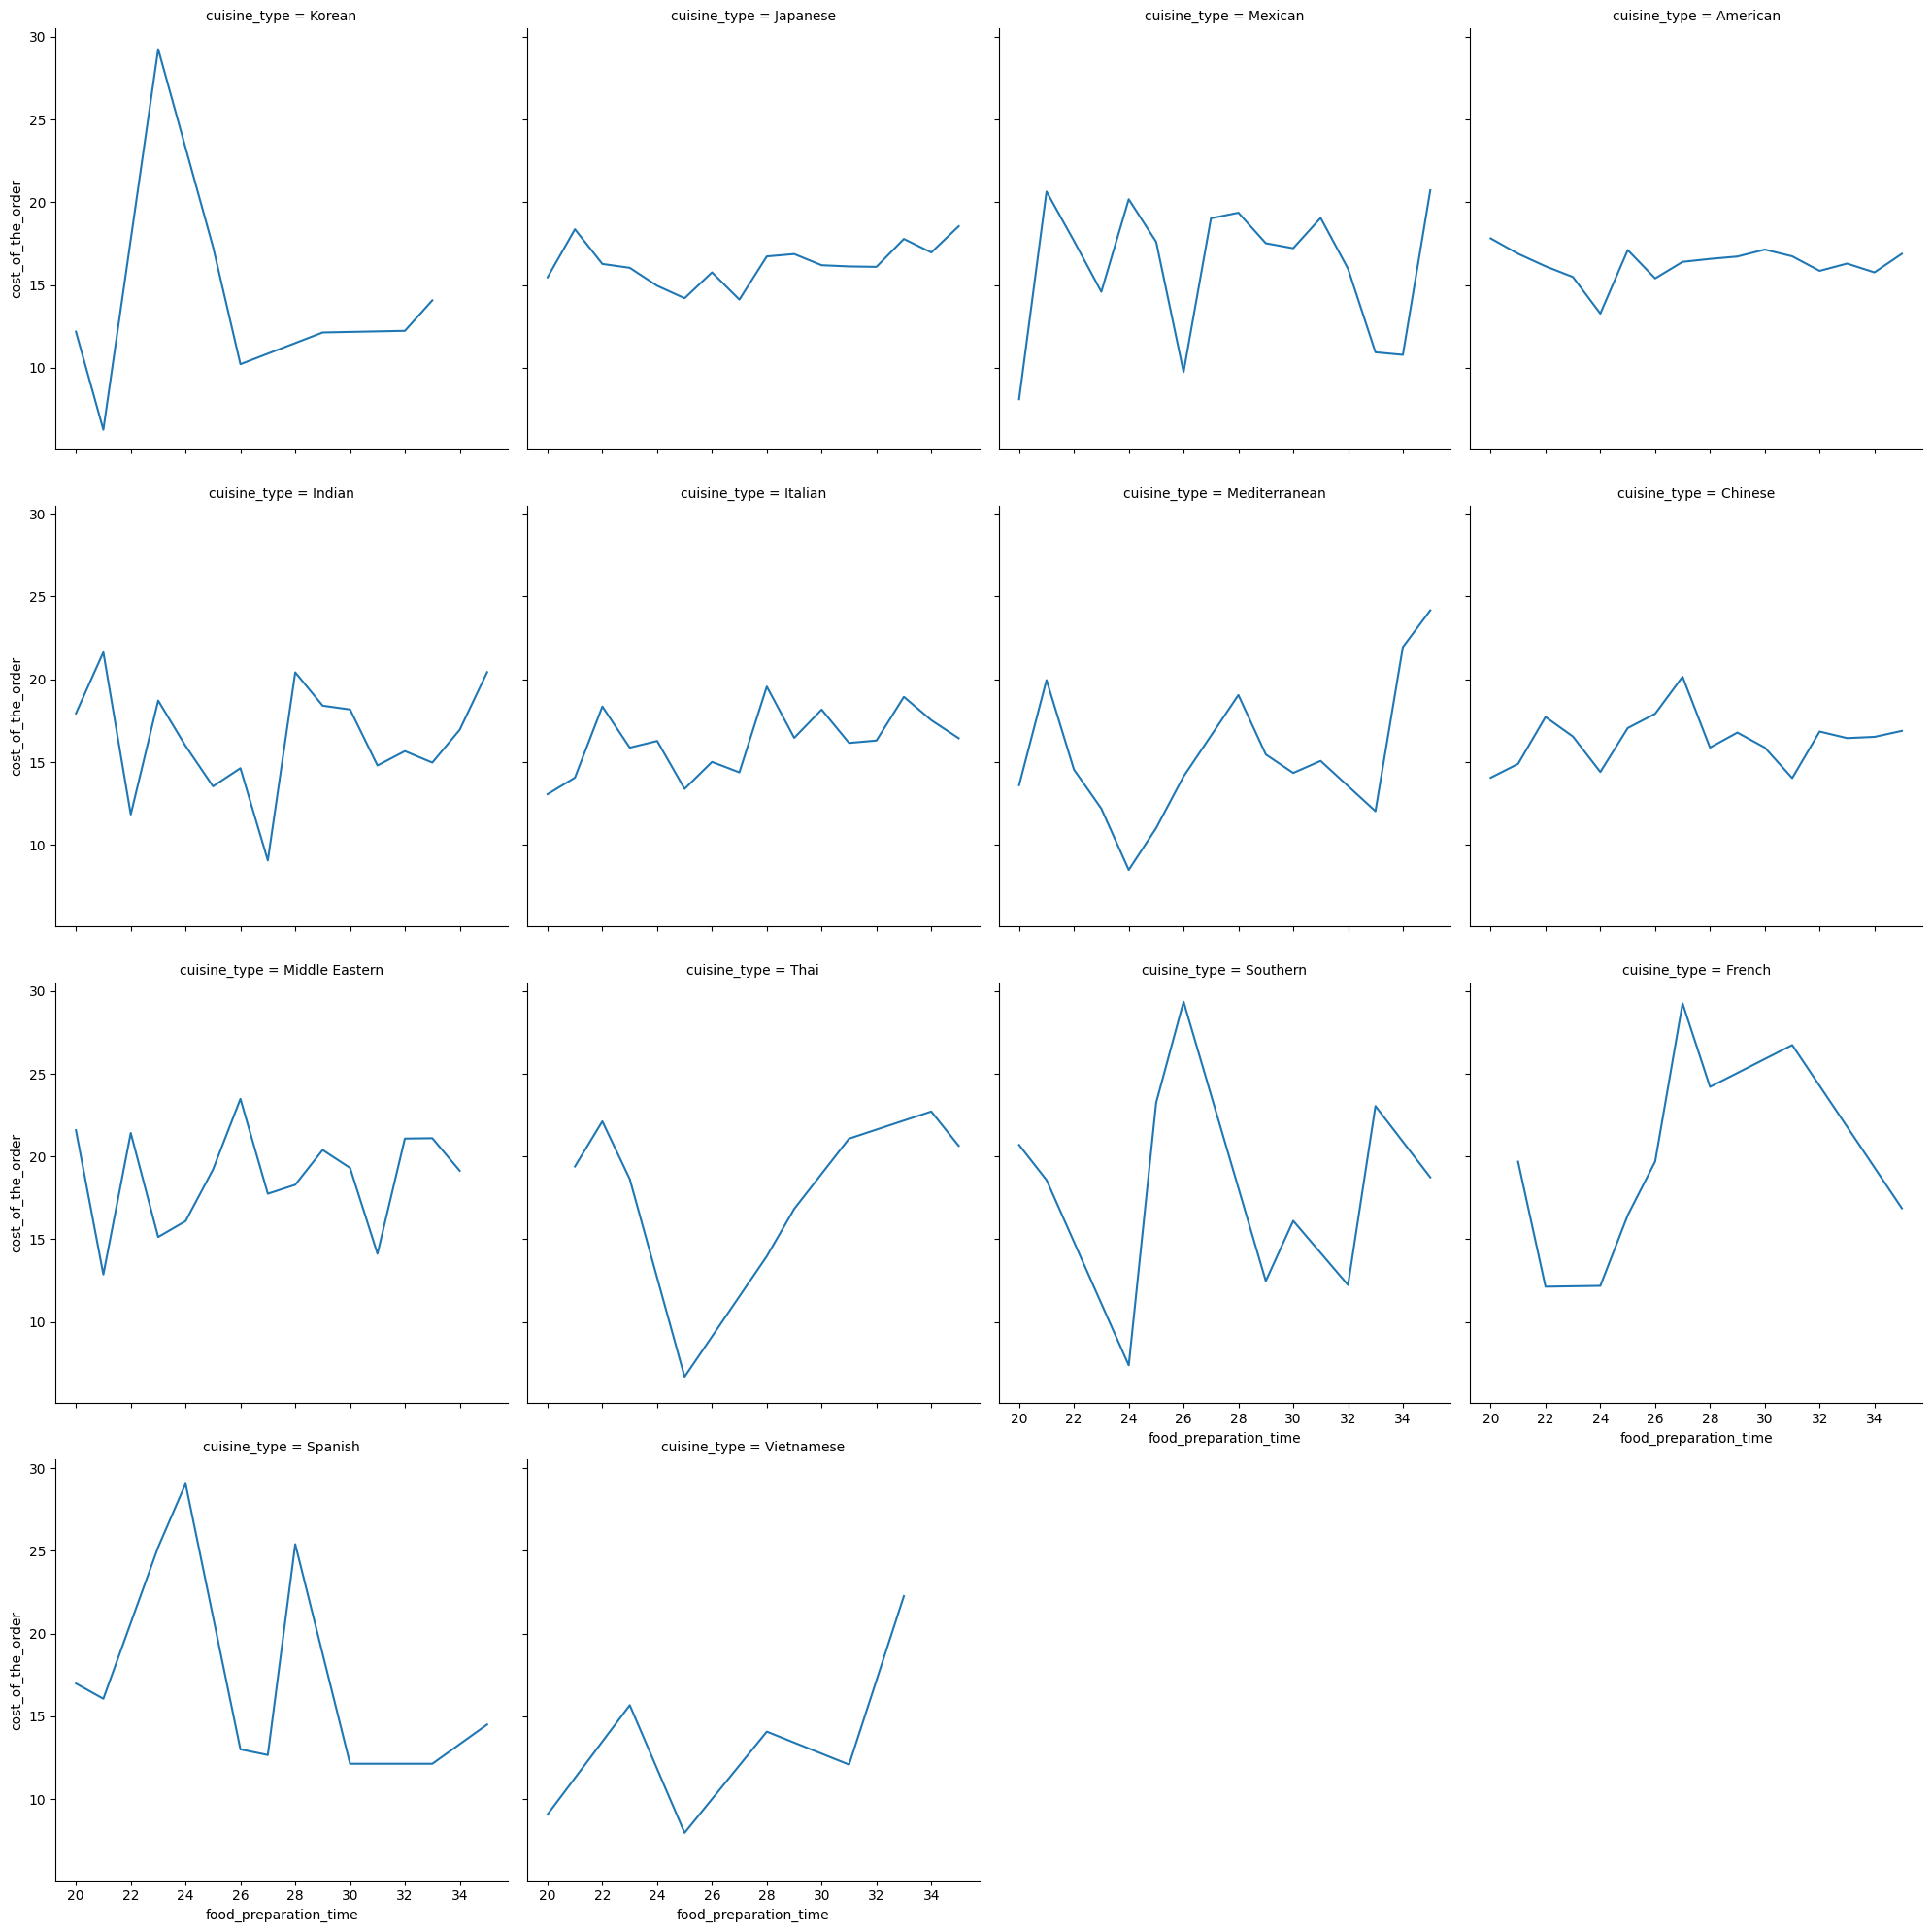

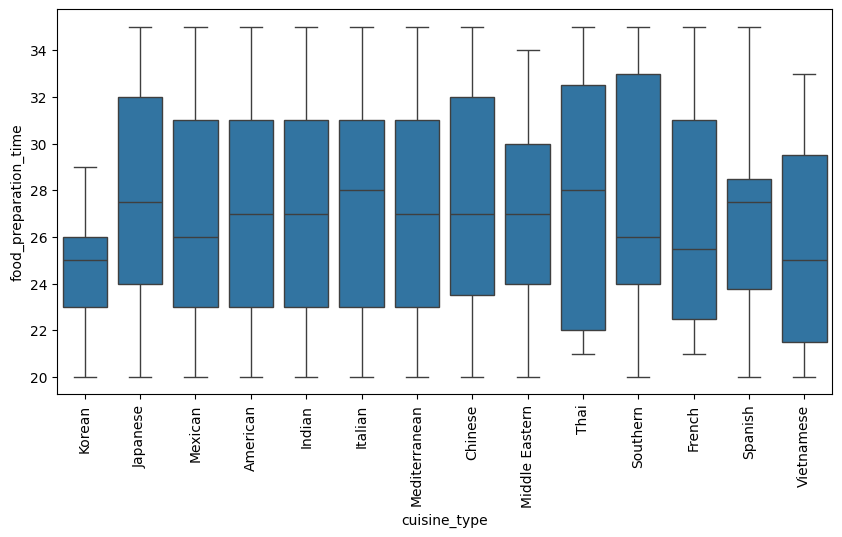

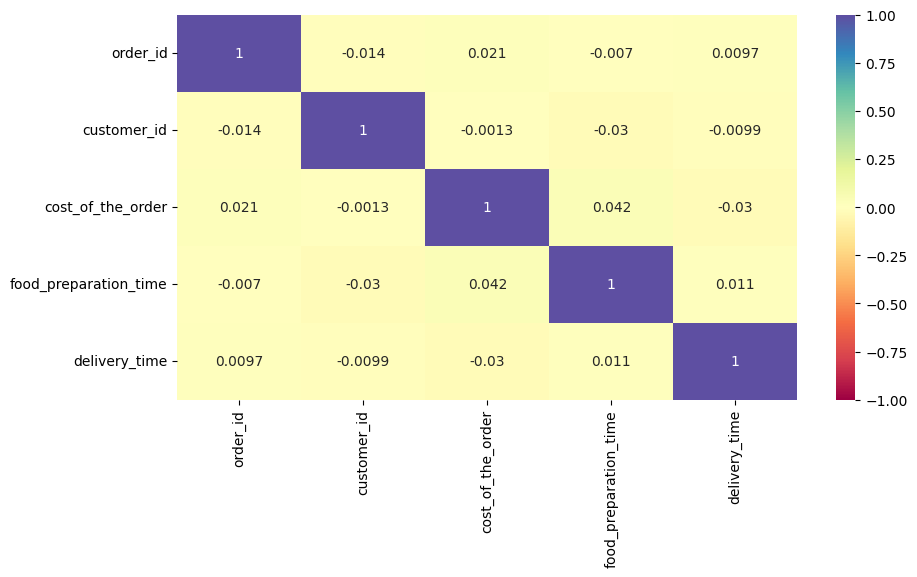

In [ ]:
# Write the code here
sns.barplot(data=foodhub,x='cuisine_type',y='delivery_time')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=foodhub,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

sns.relplot(data=foodhub,x='food_preparation_time',y='cost_of_the_order',col='cuisine_type',kind='line', errorbar=None, col_wrap=4)
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=foodhub,x='cuisine_type',y='food_preparation_time',showfliers=False) # turning off outliers
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,5))
sns.heatmap(foodhub.corr(numeric_only=True),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()


*   Vietnamese Orders take the longest to be delivered.
*   Korean Orders take the shortest to be delivered
*   French food is the most expensive on average, followed by Middle Eastern, Thai, Spanish, and Southern
*   Vietnamese and Korean are the least expensive on average

*   The food preparation time doesn't have a correlation wiht the cost of the order for most cuisine types.
*   Thai Food has the largest average food preparation time followed by Thai food and Japanese Food.

*   Cost of the order and the food preparation time have the highest correlation compared to any other variables


*   The longer the food took, the more expensive it was.
*  





### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Filter the rated restaurants
foodhub_rated =foodhub[foodhub['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
foodhub_rated['rating'] = foodhub_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = foodhub_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()


# Get restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = foodhub_rated[foodhub_rated['restaurant_name'].isin(rest_names)].copy()

# Group restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.512
1,Blue Ribbon Fried Chicken,4.328
2,Shake Shack,4.278
3,Blue Ribbon Sushi,4.219


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_net_revenue(df):
  # Write the code here
#Sort orders that cost more than $20 dollars and multiply by 25%
#Sort orders that cost more than $5 dollars and multiply by 15%
#Combine both numbers and print

  #set count
  net_revenue = 0
  #iterate through a for loop
  for index, row in df.iterrows():
    order_cost = row['cost_of_the_order']
    #set if conditions to determine which commission rate the order cost is placed in
    if order_cost > 20:
      commission_rate = 0.25
    elif order_cost > 5:
      commission_rate = 0.15
    else:
      commission_rate = 0
  # find the commission total and add total values together to find net revenue
    commission = commission_rate * order_cost
    net_revenue += order_cost - commission

  return net_revenue

# Calculate and print the net revenue
net_revenue = calculate_net_revenue(foodhub)
print(f"Net revenue: ${net_revenue:.2f}")

Net revenue: $25148.52


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# Calculate total time
total_time = foodhub['food_preparation_time'] + foodhub['delivery_time']

# Identify orders that take more than 60 minutes
long_orders = total_time > 60

# Calculate the percentage of long orders
percentage_long_orders = long_orders.mean() * 100

# Print the result
print(f"Percentage of orders that take more than 60 minutes: {percentage_long_orders:.2f}%")



Percentage of orders that take more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
#compare mean delivery time between weekend and weekdays
#first we need to find the mean delivery time for both weekdays and weekends
# Calculate the mean delivery time for weekdays
weekday_time = foodhub[foodhub['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate the mean delivery time for weekends
weekend_time = foodhub[foodhub['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# Print the results
print("Mean delivery time on weekdays:", weekday_time)
print("Mean delivery time on weekends:", weekend_time)


Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735




```
# This is formatted as code
```

#### Observations:
### The mean delivery time on weekdays is longer than the time on weekends by about 6 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


*   The average cost of an order is $16.50
*   The average time it takes for the food to be made is 27 minutes
*   The average time it takes for the food to be delivered is 24 minutes
*   There are 736 Orders that were not rated by customers. Most customers don't find it necessasry to rate orders.


*   Weekend orders are more than doubled the amount of orders on the weekdays
*   The majority of ordered cuisine types are American, Japanese, Italian, and Chinese.


*   French Cuisine type has the highest average cost of order.
*   Vietnamese has the lowest average cost of order








*   Vietnamese Orders take the longest to be delivered.
*   Korean Orders take the shortest to be delivered
*   French food is the most expensive on average, followed by Middle Eastern, Thai, Spanish, and Southern
*   Vietnamese and Korean are the least expensive on average

*   The food preparation time doesn't have a correlation wiht the cost of the order for most cuisine types.
*   Thai Food has the largest average food preparation time followed by Thai food and Japanese Food.

*   Cost of the order and the food preparation time have the highest correlation compared to any other variables





### Recommendations:

*  I would recommend to push users to rate orders as most of the orders were not rated.


*   This would cause that column to be more useful and more accurate when analyzing data.
*   I would maybe add more columns such as tip amount so you could see which customers liked which restaurants the most and what type of cuisine types had the most tip amount.



---